In [3]:
from keras import layers, models
from keras.utils import pad_sequences

In [4]:
from keras.datasets import imdb

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [6]:
maxlen = 20

In [8]:
x_train = pad_sequences(x_train, maxlen = maxlen)

In [9]:
x_test = pad_sequences(x_test, maxlen = maxlen)

In [10]:
y_train = y_train.astype('float64')

In [11]:
y_test = y_test.astype('float64')

In [12]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [15]:
def get_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 8, input_length = maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.compile(
        optimizer = 'rmsprop',
        loss = 'binary_crossentropy',
        metrics = ['acc']
    )
    
    return model

In [16]:
model = get_model()

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_1 (Flatten)         (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(
    x_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2
)

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 0.6725 - acc: 0.6141 - val_loss: 0.6250 - val_acc: 0.6910
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5435 - acc: 0.7508 - val_loss: 0.5264 - val_acc: 0.7274
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4606 - acc: 0.7867 - val_loss: 0.5038 - val_acc: 0.7444
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 0.4223 - acc: 0.8082 - val_loss: 0.4970 - val_acc: 0.7512
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3971 - acc: 0.8201 - val_loss: 0.4978 - val_acc: 0.7524
Epoch 6/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3764 - acc: 0.8310 - val_loss: 0.5019 - val_acc: 0.7560
Epoch 7/10
625/625 [==============================] - 1s 1ms/step - loss: 0.3587 - acc: 0.8430 - val_loss: 0.5067 - val_acc: 0.7532
Epoch 8/10
625/625 [==============================] - 1s 1ms/step - loss: 0.

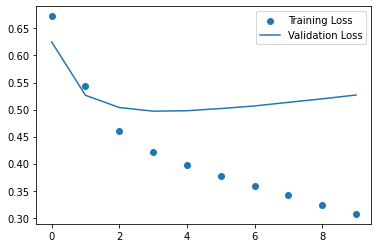

In [21]:
import matplotlib.pyplot as plt
plt.scatter(range(len(history.history['loss'])), history.history['loss'], label = 'Training Loss')
plt.plot(range(len(history.history['val_loss'])), history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

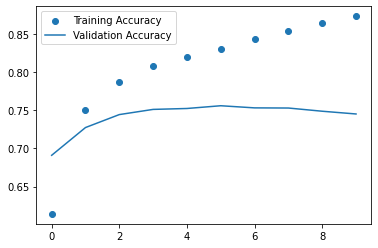

In [22]:
plt.scatter(range(len(history.history['acc'])), history.history['acc'], label = 'Training Accuracy')
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.show()